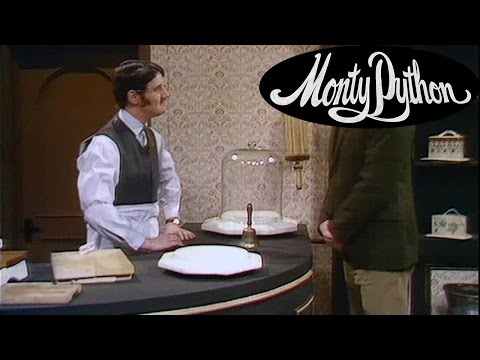

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("cWDdd5KKhts",start=86,width="640",height="390")

# Functions & modules

## Functions

Python can be both procedural (using functions) and object oriented (using classes)

[We do objects tomorrow, but much of the function stuff now will also be applicable.]

### Functions looks like:

> `def` `function_name`(`arg1`,`arg2`, ..., `kw1`=v1, `kw2`=v2, `kw3`=v3, ...)

 - argX are `arguments`: required (and sequence is important)
 - kwX are `keywords`: optional (sequence unimportant; vals act like defaults)

<u>You can name a function anything you want as long as it</u>:
 - contains only numbers, letters, underscore
 - does not start with a number
 - is not the same name as a built-in function (like print)
 
 <pre>
 
 </pre>
<div class="alert alert-info">
  There is no difference between functions and procedures:
  unlike, say in, IDL, in Python functions that return nothing formally, still return None
</div>

In [8]:
def addnums(x,y):
    return x + y

addnums(2,3)

5

In [10]:
addnums(0x1f,3.3)

34.3

In [12]:
addnums("a","b")   # oh no!

'ab'

In [14]:
addnums("cat",23232)

TypeError: Can't convert 'int' object to str implicitly

<div class="alert alert-warning">
Unlike in C, we cannot declare what type of variables are required by the function. Python is dynamically typed.
</div>

In [17]:
def addnums(x,y):
    if isinstance(x,(float,int)) and isinstance(y,(float,int)):
        return x + y
    print("I cannot add these types (" + str(type(x)) + ", " + str(type(y)) + ")")
    return

addnums(2,3.0)

5.0

In [16]:
addnums(1,"a")

I cannot add these types (<class 'int'>,<class 'str'>)


Python 3 does have `function annotations` that allow the arbitrary assignments of information to function arguments. There are ways to "enforce" typing at runtime, allow function annotations are usually used for static code analysis.

```python
def return_hello(name: str, how_many: int) -> str:
    return("hello, " +  name*how_many)

In[1]: return_hello("friend",2)

Out[1]: 'hello, friendfriend'
```

## Scope

In [18]:
addnums

<function __main__.addnums>

In [19]:
id(addnums)

4409925840

In [20]:
type(addnums)

function

In [23]:
x = 2
addnums(5,6)

11

In [24]:
print(x)

2


<div class="alert alert-info">
Python has it’s own local variables list. `x` is not modified globally (unless you make it an explict `global` variable).</div>

In [25]:
def numop(x,y):
    x *= 3.14
    return x + y

In [27]:
x = 1
numop(x,3)

6.140000000000001

In [28]:
print(x)

1


Let's try to make a `global` variable:

In [29]:
def numop(x,y):
    x *= 3.14
    global a
    a += 1
    return x + y, a  ## note: we're returning a tuple here

In [31]:
a = 1
numop(1,1)

(4.140000000000001, 2)

In [32]:
numop(1,1)

(4.140000000000001, 3)

<div class="alert alert-success">
We can return whatever we want from a function (dictionary, tuple, lists, strings, etc.). This is really awesome...
</div>

### keywords

In [33]:
def numop1(x,y,multiplier=1.0,greetings="Thank you for your inquiry."):
    if greetings is not None:
        print(greetings)
    return (x + y)*multiplier

In [34]:
numop1(1,1)

Thank you for your inquiry.


2.0

In [35]:
numop1(1,1,multiplier=-0.5,greetings=None)

-1.0

<div class="alert alert-info">
keywords are a natural way to grow new functionality without "breaking" old code
</div>

### `*arg`, `**kwargs` captures unspecified args and keywords

see http://docs.python.org/tutorial/controlflow.html#keyword-arguments

In [38]:
def cheeseshop(kind, *arguments, **keywords):
    print("— Do you have any", kind + "?")
    print("— I'm sorry, we're all out of", kind)
    for arg in arguments: 
        print(arg)
    
    print("-" * 40)
    keys = list(keywords.keys())
    keys.sort()
    for kw in keys: 
        print(kw, ":", keywords[kw])

In [39]:
cheeseshop("Limburger", "It's very runny, sir.",
           "It's really very, VERY runny, sir.",
           shopkeeper='Michael Palin',
           client="John Cleese",
           sketch="Cheese Shop Sketch")

— Do you have any Limburger?
— I'm sorry, we're all out of Limburger
It's very runny, sir.
It's really very, VERY runny, sir.
----------------------------------------
client : John Cleese
shopkeeper : Michael Palin
sketch : Cheese Shop Sketch


# Documentation
Just the Right thing to Do and Python makes it dead simple

### `Docstring`: the first unassigned string in a function (or class, method, program, etc.)

In [48]:
def numop1(x,y,multiplier=1.0,greetings="Thank you for your inquiry."):
    """ numop1 -- this does a simple operation on two numbers. 
     We expect x,y are numbers and return x + y times the multiplier
     multiplier is also a number (a float is preferred) and is optional. 
     It defaults to 1.0.
     You can also specify a small greeting as a string. """
    if greetings is not None:
        print(greetings)
        
    return (x + y)*multiplier

In [49]:
help(numop1)

Help on function numop1 in module __main__:

numop1(x, y, multiplier=1.0, greetings='Thank you for your inquiry.')
    numop1 -- this does a simple operation on two numbers. 
    We expect x,y are numbers and return x + y times the multiplier
    multiplier is also a number (a float is preferred) and is optional. 
    It defaults to 1.0.
    You can also specify a small greeting as a string.



In [66]:
del numop1 ## remove that function from the namespace

Let's make some nice looking webpage documentation

In [53]:
%%writefile numop1.py

"""Some functions written to demonstrate a bunch of concepts like modules, import, and command-line programming.
  
   created by Josh Bloom at UC Berkeley (ucbpythonclass+bootcamp@gmail.com)
"""

def numop1(x,y,multiplier=1.0,greetings="Thank you for your inquiry."):
    """ numop1 -- this does a simple operation on two numbers. 
     We expect x,y are numbers and return x + y times the multiplier
     multiplier is also a number (a float is preferred) and is optional. 
     It defaults to 1.0.
     You can also specify a small greeting as a string. """
    if greetings is not None:
        print(greetings)
        
    return (x + y)*multiplier

Overwriting numop1.py


In [54]:
!pydoc -w numop1

wrote numop1.html


In [55]:
from IPython.display import IFrame
IFrame('numop1.html', width=700, height=350)

# Modules

Organized units (written as files) which contain functions, statements and other definitions

<div class="alert alert-success">
Any file ending in `.py` is treated as a module
(e.g., `numop1.py`, which names and defines a function `numop1`)
</div>

Modules: own global names/functions so you can name things whatever you want there and not conflict with the names in other modules.

In [62]:
%%writefile numfun1.py
"""
small demo of modules
"""

def numop1(x,y,multiplier=1.0,greetings="Thank you for your inquiry."):
    """ numop1 -- this does a simple operation on two numbers. 
         We expect x,y are numbers and return x + y times the multiplier
         multiplier is also a number (a float is preferred) and is optional. 
         It defaults to 1.0.
         You can also specify a small greeting as a string."""
    
    if greetings is not None:
        print(greetings)
    
    return (x + y)*multiplier


Overwriting numfun1.py


## `import` *module_name*
gives us access to that module’s functions

In [63]:
import numfun1

In [64]:
numfun1.numop1(2,3,2,greetings=None)

10

In [67]:
numop1(2,3,2,greetings=None)

NameError: name 'numop1' is not defined

In [70]:
%%writefile numfun2.py
"""
small demo of modules
"""

## do some stuff and set some variables
print("numfun2 in the house")
x    = 2
s    = "spamm"

def numop1(x,y,multiplier=1.0,greetings="Thank you for your inquiry."):
    """ 
Purpose: does a simple operation on two numbers. 

Input: We expect x,y are numbers 
       multiplier is also a number (a float is preferred) and is optional.  
       It defaults to 1.0. You can also specify a small greeting as a string.

Output: return x + y times the multiplier
    """
    if greetings is not None:
          print(greetings)
    return (x + y)*multiplier


Overwriting numfun2.py


In [86]:
import numfun2

In [71]:
import numfun2         # numfun2 is already imported...do nothing

In [72]:
print(numfun2.x, numfun2.s)

2 spamm


In [74]:
s = "eggs" ; print(s, numfun2.s)

eggs spamm


In [75]:
numfun2.s = s

In [76]:
print(s, numfun2.s)

eggs eggs


In [87]:
# delete numfun2 from the namespace
del numfun2


   - `dir()` gives a list of in scope variables
   - `globals()` gives a dictionary of global variables
   - `locals()` gives a dictionary of local variables


In [88]:
dir()

['IFrame',
 'In',
 'Out',
 'YouTubeVideo',
 '_',
 '_1',
 '_10',
 '_12',
 '_15',
 '_17',
 '_18',
 '_19',
 '_2',
 '_20',
 '_21',
 '_23',
 '_27',
 '_3',
 '_31',
 '_32',
 '_34',
 '_35',
 '_4',
 '_43',
 '_44',
 '_45',
 '_52',
 '_55',
 '_64',
 '_65',
 '_7',
 '_79',
 '_8',
 '_80',
 '_81',
 '_82',
 '_84',
 '_85',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i64',
 '_

how to bring some of module’s functions into the current namespace:

```python
from module_name import function_name
from module_name import variable
from module_name import variable, function_name1, function_name2, ...
```

Let's restart the kernel.

In [1]:
from numfun2 import x, numop1

numfun2 in the house


In [2]:
x == 2

True

In [4]:
numop1(2,3,2,greetings=None)

10

In [5]:
s

NameError: name 's' is not defined

In [6]:
numfun2.x

NameError: name 'numfun2' is not defined

In [7]:
import numfun2
numfun2.x

2

# Renaming a function (or variable) for your namespace:

```python
from module_name import name as my_name
```

In [8]:
from numfun2 import s as my_fav_food
from numfun2 import numop1 as wicked_awesome_adder

In [10]:
print(my_fav_food)

spamm


In [11]:
print(wicked_awesome_adder(2,3,1))

Thank you for your inquiry.
5


# Kitchen-Sinking It

```python
from module_name import *
```

In [12]:
from numfun2 import *

In [13]:
print(numop1(x,3,1))

Thank you for your inquiry.
5


<div class="alert alert-warning">
This `from ... import *` is very convenient in the interpreter, but considered bad coding style. It pollutes your namespace.
</div>

# Built-In Modules

give access to the full range of what Python can do

<u>For example,</u>

  - `sys` exposes interpreter stuff & interactions (like environment and file I/O)
  - `os` exposes platform-specific OS functions (like file statistics, directory services) 
  - `math` basic mathematical functions & constants 

These are super battle tested and close to the optimal way for doing things within Python

In [14]:
import sys
help(sys)

Help on built-in module sys:

NAME
    sys

MODULE REFERENCE
    https://docs.python.org/3.5/library/sys.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to some objects used or maintained by the
    interpreter and to functions that interact strongly with the interpreter.
    
    Dynamic objects:
    
    argv -- command line arguments; argv[0] is the script pathname if known
    path -- module search path; path[0] is the script directory, else ''
    modules -- dictionary of loaded modules
    
    displayhook -- called to show results in an interactive session
    excepthook -- called to handle any uncaught exception other than SystemExit
      To customize prin

In [15]:
%%writefile getinfo.py

import os
import sys

def getinfo(path="."):
    """
Purpose: make simple use of os and sys modules
Input: path (default = "."), the directory you want to list
    """
    print("You are using Python version ",end=" ")
    print(sys.version)
    print("-" * 40)
    print("Files in the directory " + str(os.path.abspath(path)) + ":")
    for f in os.listdir(path): 
        print(f)

Writing getinfo.py


   - `os.listdir()` - return a dictionary of all the file names in the specified directory
   - `sys.version` - string representation of the Python (and gcc) version
   - `os.path.abspath()` - translation of given pathname to the absolute path (operating system-specific)

In [17]:
import getinfo

In [19]:
getinfo.getinfo("/tmp")

You are using Python version  3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
----------------------------------------
Files in the directory /tmp:
.keystone_install_lock
_avast_
avast-store-aos-update-1471628571-1746.log
avast-store-aos-update-1471628572-1836.log
avastinit-1471627954-83.log
avastinit-1471628572-1873.log
avastprogupdate-1471628566-1432.log
avastuserinit--1471627963-jbloom-445.log
avastuserinit--1471627963-jbloom-454.log
avastuserinit-start-1471628572-jbloom-1897.log
avastuserinit-stop-1471628567-jbloom-1482.log
avastuserinit-update-1471628571-jbloom-1773.log
com.apple.launchd.7v08c0O8ZY
com.apple.launchd.bYz30O9xjK
com.apple.launchd.o9VMAhbsXt
ct.shutdown
proxy-bv9Ur9
ws.agile.493328730


<blockquote>
Python’s standard library is very extensive, offering a wide range of facilities as indicated by the long table of contents listed below. The library contains built-in modules (written in C) that provide access to system functionality such as file I/O that would otherwise be inaccessible to Python programmers, as well as modules written in Python that provide standardized solutions for many problems that occur in everyday programming. Some of these modules are explicitly designed to encourage and enhance the portability of Python programs by abstracting away platform-specifics into platform-neutral APIs.
</blockquote>

<div> -- https://docs.python.org/3/library/</div>

In [22]:
from IPython.display import IFrame
IFrame('https://docs.python.org/3/library/', width="90%", height="600")

<img src="http://imgs.xkcd.com/comics/python.png">

# Making a Script Executable

When a script/module is run from the command line, a special variable called `__name__` is set to `"__main__"`

On the first line of a script, say what to run the script with (as with Perl):

In [5]:
%%writefile script_name.py
#!/usr/bin/env python
"""doctring for this module"""

# all your module stuff here

# at the bottom stick...
if __name__ == "__main__":
    """only executed if this module is called from the command line"""
    
    ## can call functions from within this module
    print("I was called from the command line!")  

Overwriting script_name.py


In [6]:
%%bash
chmod a+x script_name.py  ## set execute permissions of that script. This works in UNIX, Mac OSX
./script_name.py

I was called from the command line!


In [11]:
%%writefile modfun.py
#!/usr/bin/env python                                                                                                      
"""                                                                                                                        
Some functions written to demonstrate a bunch of concepts like modules, import                                             
and command-line programming                                                                                               
"""
import os
import sys

def getinfo(path=".",show_version=True):
    """                                                                                                                    
Purpose: make simple us of os and sys modules                                                                               Input: path (default = "."), the directory you want to list                                                                
    """
    if show_version:
        print("-" * 40)
        print("You are using Python version ",end=" ")
        print(sys.version)
        print("-" * 40)

    print("Files in the directory " + str(os.path.abspath(path)) + ":")
    for f in os.listdir(path): 
        print ("  " + f)
    print("*" * 40)

if __name__ == "__main__":
    """                                                                                                                    
Executed only if run from the command line.                                                                                
call with                                                                                                                  
  modfun.py <dirname> <dirname> ...                                                                                        
If no dirname is given then list the files in the current path                                                             
    """
    if len(sys.argv) == 1:
        getinfo(".", show_version=True)
    else:
        for i,dir in enumerate(sys.argv[1:]):
            if os.path.isdir(dir):
                # if we have a directory then operate on it                                                                
                # only show the version info if it's the first directory                                                   
                getinfo(dir,show_version=(i==0))
            else:
                print("Directory: " + str(dir) + " does not exist.")
                print("*" * 40)

Overwriting modfun.py


In [12]:
!chmod a+x modfun.py

In [13]:
!./modfun.py

----------------------------------------
You are using Python version  3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
----------------------------------------
Files in the directory /Users/jbloom/Classes/python-bootcamp/Lectures/03_FunctionsAndModules:
  .ipynb_checkpoints
  __pycache__
  day1_modules_def_io.key
  day1_modules_def_io.pdf
  getinfo.py
  modfun.py
  numfun1.py
  numfun2.py
  numop1.html
  numop1.py
  script_name.py
  Untitled.ipynb
****************************************


In [14]:
!./modfun.py . MySpamDir /tmp/ 

----------------------------------------
You are using Python version  3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
----------------------------------------
Files in the directory /Users/jbloom/Classes/python-bootcamp/Lectures/03_FunctionsAndModules:
  .ipynb_checkpoints
  __pycache__
  day1_modules_def_io.key
  day1_modules_def_io.pdf
  getinfo.py
  modfun.py
  numfun1.py
  numfun2.py
  numop1.html
  numop1.py
  script_name.py
  Untitled.ipynb
****************************************
Directory: MySpamDir does not exist.
****************************************
Files in the directory /tmp:
  .keystone_install_lock
  _avast_
  avast-store-aos-update-1471628571-1746.log
  avast-store-aos-update-1471628572-1836.log
  avastinit-1471627954-83.log
  avastinit-1471628572-1873.log
  avastprogupdate-1471628566-1432.log
  avastuserinit--1471627963-jbloom-445.log
  avastuserinit--1471627963-jbloom-454.log
  avastuserini

### If you make changes to a (module) file and want to reload it into the name space:

```python
import importlib
importlib.reload(module_name)
```

this is also true if you want to reload a module that was imported from an (unchanged) module

In [15]:
%%writefile josh1.py
import josh2
x = 1

Writing josh1.py


In [16]:
%%writefile josh2.py
y = 2

Writing josh2.py


In [17]:
import josh1 ; print(josh1.josh2.y)

2


now edit `josh2.py`...

In [18]:
%%writefile josh2.py
y = True

Overwriting josh2.py


In [19]:
import josh1 ; print(josh1.josh2.y)

2


In [21]:
from importlib import reload
reload(josh1.josh2) ; print(josh1.josh2.y)

True


# Breakout Session: exploring some modules

<div class="alert alert-success">Remember that `help()` is your friend</div>

A. create and edit a new file called `age.py`

B. within `age.py`, import the `datetime` module

  - use `datetime.datetime()` to create a variable representing when you were born
  - use `datetime.datetime.now()` to create a variable representing now
  - subtract the two, forming a new variable, which will be a `datetime.timedelta()` object. Print that variable.

1. how many days have you been alive? How many hours?
2. What will be the date in 1000 days from now?

C. create and edit a new file called age1.py

when run from the command line with 1 argument, `age1.py` should print out the date in days from now. If run with three arguments print the time in days since then.

```bash
prompt> ./age1.py 1000
date in 1000 days 2017-10-09 07:40:49.682973
prompt> ./age1.py 1980 1 8
days since then... 11699
```